<a href="https://colab.research.google.com/github/rafaelnduarte/Cerrado_Basquete/blob/master/Cerrado_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cerrado Basquete
 
[<center><img alt="LinkedIn" width="20%" src="https://www.freepnglogos.com/uploads/linkedin-png-logo-23.png
"></center>](https://www.linkedin.com/in/rafael-n-duarte/) 
[<center><img alt="GitHub" width="20%" src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png
"></center>](https://github.com/rafaelnduarte)

> O intuito deste projeto é realizar **análises estatísticas** e encontrar soluções de **Inteligência Artificial** que possam suprir a equipe técnica com insights, que possam ajudar a equipe com seu planejamento tático, técnico, desenvolvimento e contratação de jogadores, etc.


<center><img alt="Cerrado Basquete" width="70%" src="https://scontent.fbsb4-1.fna.fbcdn.net/v/t1.0-9/13876325_1740697609531696_2785376768243641308_n.png?_nc_cat=106&_nc_oc=AQmYjLnt8XvgiNE5BPKufa3e-JPVBGONNYqfUjrdzTRj79dX81DMDA3FxOXHZo2YY8OpKtIL_lHfUbRYWKC0lMTY&_nc_ht=scontent.fbsb4-1.fna&oh=2adf231a0d124ca9e4c39d193a0ee296&oe=5E62AE67
"></center>

In [0]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Análise dos Jogadores

<center><img alt="Cerrado Basquete" width="60%" src="https://i.superesportes.com.br/vJHv45VIdYgr76ilyxO4unDxJdE=/smart/imgsapp.df.superesportes.com.br/app/noticia_127116951798/2019/07/03/63853/20190703115437467813o.jpg"></center>


#### Dicionário de variáveis

* rank - Posição do jogador no ranking
* jogador - Nome e número da camisa do jogador
* equipe - Equipe do jogador
* jo - Número de partidas
* min - Média de minutos por jogo
* ef - Média de eficiência
* pts - Média de pontos por jogo
* rt - Média de rebotes totais por jogo
* as - Média de assistências por jogo
* br - Média de bolas recuperadas por jogo (Steals)
* to - Média de tocos por jogo
* er - Média de erros por jogo (Turnovers)

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Cerrado_Basquete/master/data/cerrado_roster.csv', index_col=0)
df.head(10)

,rank,jogador,equipe,jo,min,ef,pts,rt,as,br,to,er
0,80,Johnny #23,Cerrado Basquete,15,13.27,2.73,3.60,1.60,0.47,0.33,0.00,0.87
1,69,Luis #9,Cerrado Basquete,16,19.94,3.94,7.56,1.38,1.25,0.44,0.00,2.06
2,33,G. Servelin #3,Londrina,18,26.98,9.39,8.00,3.61,1.50,1.50,0.33,1.28
3,21,Ricardo #33,Londrina,18,29.38,11.83,10.83,4.72,1.28,0.67,0.11,0.44
4,28,Luizinho #11,UNIFACISA,25,22.23,10.40,7.44,4.24,1.68,0.96,0.28,1.08
5,148,Lucas #4,Minas,29,13.09,2.40,2.52,1.30,1.20,0.40,0.00,1.30
6,168,Mendes #30,Bauru,9,7.54,2.30,1.78,1.89,0.10,0.00,0.00,0.40
7,4,Rodrigo #5,America,11,25.20,10.20,12.10,4.72,1.27,0.00,0.18,1.30
8,120,Pablo #13,Libertad,8,21.00,5.10,8.20,3.10,0.90,0.00,0.00,0.00
9,30,Dida #32,Atlético Puerto Varas,8,32.12,9.00,9.00,6.25,1.62,1.00,0.25,1.87


In [45]:
# distribuição estatística dos dados dos jogadores
print('\t\t\t\t DISTRIBUIÇÃO ESTATÍSTICA DOS JOGADORES')
df.describe()

				 DISTRIBUIÇÃO ESTATÍSTICA DOS JOGADORES


,rank,jo,min,ef,pts,rt,as,br,to,er
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,66.181818,16.363636,21.668182,7.206364,7.684545,3.446364,1.115455,0.572727,0.122727,1.218182
std,56.096022,7.131237,7.694525,3.919559,3.789463,1.712421,0.480091,0.497475,0.129853,0.809454
min,4.000000,8.000000,7.540000,2.300000,1.780000,1.300000,0.100000,0.000000,0.000000,0.000000
25%,27.500000,10.000000,16.605000,3.335000,5.520000,1.745000,0.950000,0.165000,0.000000,0.655000
50%,33.000000,16.000000,22.230000,9.000000,8.000000,3.610000,1.250000,0.440000,0.110000,1.280000
75%,100.000000,20.500000,27.290000,10.300000,9.915000,4.720000,1.390000,0.980000,0.225000,1.585000
max,168.000000,29.000000,32.120000,11.980000,13.500000,6.250000,1.680000,1.500000,0.330000,2.800000


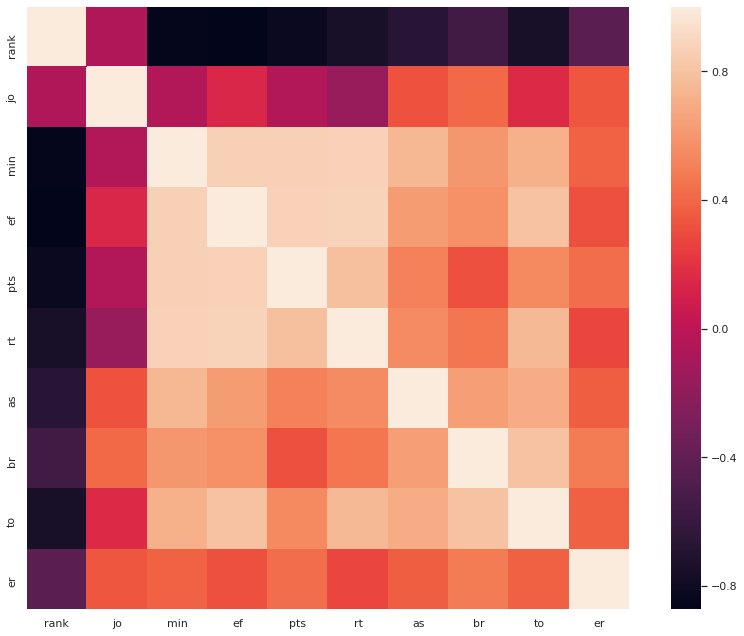

In [46]:
# criando uma matriz de correlação
corr = df.corr()

# plotando o heatmap
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=False);
plt.tight_layout()

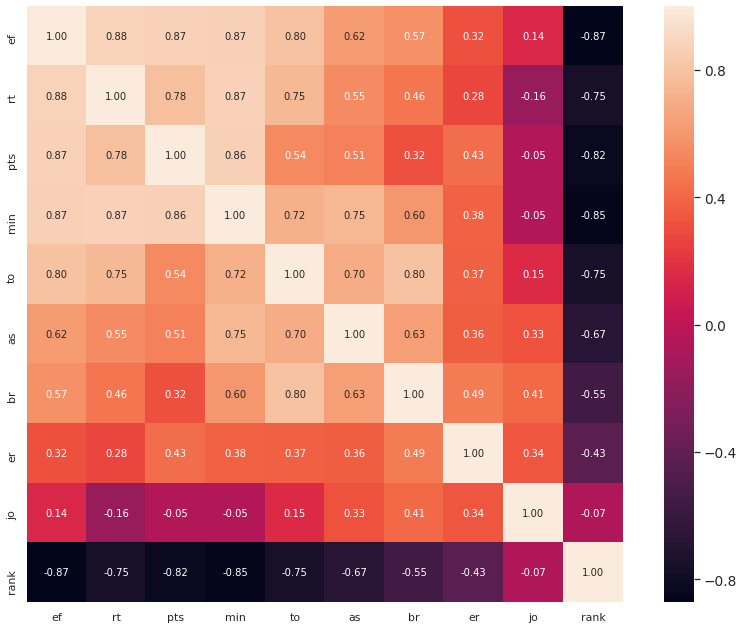

In [48]:
# número de variáveis a serem selecionadas
k = 10

# encontrando as variáveis mais correlacionadas
cols = corr.nlargest(k, 'ef')['ef'].index
cm = np.corrcoef(df[cols].values.T)

# plotando heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

In [50]:
# média de eficiência por equipe
print('JOGADORES POR EFICIÊNCIA')
df.groupby(['jogador']).ef.mean().sort_values(ascending=False)[:15]

JOGADORES POR EFICIÊNCIA


jogador
Victor #1         11.98
Ricardo #33       11.83
Luizinho #11      10.40
Rodrigo #5        10.20
G. Servelin #3     9.39
Dida #32           9.00
Pablo #13          5.10
Luis #9            3.94
Johnny #23         2.73
Lucas #4           2.40
Mendes #30         2.30
Name: ef, dtype: float64